<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Ратмир, привет!👋</b>  

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Ты можешь реагировать на комментарии как просто написав их в Markdown-ячейках, так и выделив их цветом. Например, <font color='blue'>синим</font>. Второй способ, на мой взгляд, удобнее.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
 
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку! 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Инструкция по выполнению проекта

1. Загрузите и подготовьте данные. Поясните порядок действий.
2. Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.
3. Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.
4. Проведите финальное тестирование.

# Описание данных

Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»).

**Признаки**

*RowNumber* — индекс строки в данных

*CustomerId* — уникальный идентификатор клиента

*Surname* — фамилия

*CreditScore* — кредитный рейтинг

*Geography* — страна проживания

*Gender* — пол

*Age* — возраст

*Tenure* — сколько лет человек является клиентом банка

*Balance* — баланс на счёте

*NumOfProducts* — количество продуктов банка, используемых клиентом

*HasCrCard* — наличие кредитной карты

*IsActiveMember* — активность клиента

*EstimatedSalary* — предполагаемая зарплата

**Целевой признак**

*Exited* — факт ухода клиента

## Подготовка данных

In [47]:
!pip install scikit-learn==1.1.3
!pip install imbalanced-learn

**Библиотеки**

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import recall_score
from sklearn.dummy import DummyClassifier

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Если загружаем несколько функций из одного пакета, то удобнее записать это через запятую.
    
`from sklearn.metrics import f1_score, roc_auc_score`
    
А если через запятую будет больше трех позиций, в таком случае здесь было бы идеально привести оформление в соответствие с <a href="https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html">pep8</a> - не оставлять длинных строк. 

Такое оформление предпочтительнее:    
    
`from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    f1_score, 
    mean_squared_error, 
    roc_auc_score
)`
    
        
</div>




In [8]:
#загрузим данные
data = pd.read_csv('/datasets/Churn.csv')
print(data.head(10))
data.info()

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0       

Типы данных в порядке. Но замечаем, что столбцы RowNumber, CustomerId, Surname не нужны нам в исследовании, поэтому мы их удаляем. Еще видим пропуски в столбце Tenure. Они незначительны, поэтому оставляем их без изменений.

In [9]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично
</div>


In [10]:
data = data.dropna()#удаляем значения nan, чтобы у моделей не было проблем с данными 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Всё верно, тольно было бы неплохо добавить аргументацию такого решения.
</div> 


In [11]:
#проверим корреляцию целевого признака относительно других признаков
data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.004504,-0.000062,0.002804,0.011090,-0.003937,0.030947,0.005182,-0.023950
Age,-0.004504,1.000000,-0.013134,0.031481,-0.031877,-0.014129,0.082269,-0.007037,0.283017
Tenure,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,0.002804,0.031481,-0.007911,1.000000,-0.301858,-0.019055,-0.003285,0.014351,0.117218
NumOfProducts,0.011090,-0.031877,0.011979,-0.301858,1.000000,0.005805,0.009084,0.013990,-0.050271
HasCrCard,-0.003937,-0.014129,0.027232,-0.019055,0.005805,1.000000,-0.008810,-0.006136,-0.005411
IsActiveMember,0.030947,0.082269,-0.032178,-0.003285,0.009084,-0.008810,1.000000,-0.020049,-0.155062
EstimatedSalary,0.005182,-0.007037,0.010520,0.014351,0.013990,-0.006136,-0.020049,1.000000,0.016029
Exited,-0.023950,0.283017,-0.016761,0.117218,-0.050271,-0.005411,-0.155062,0.016029,1.000000


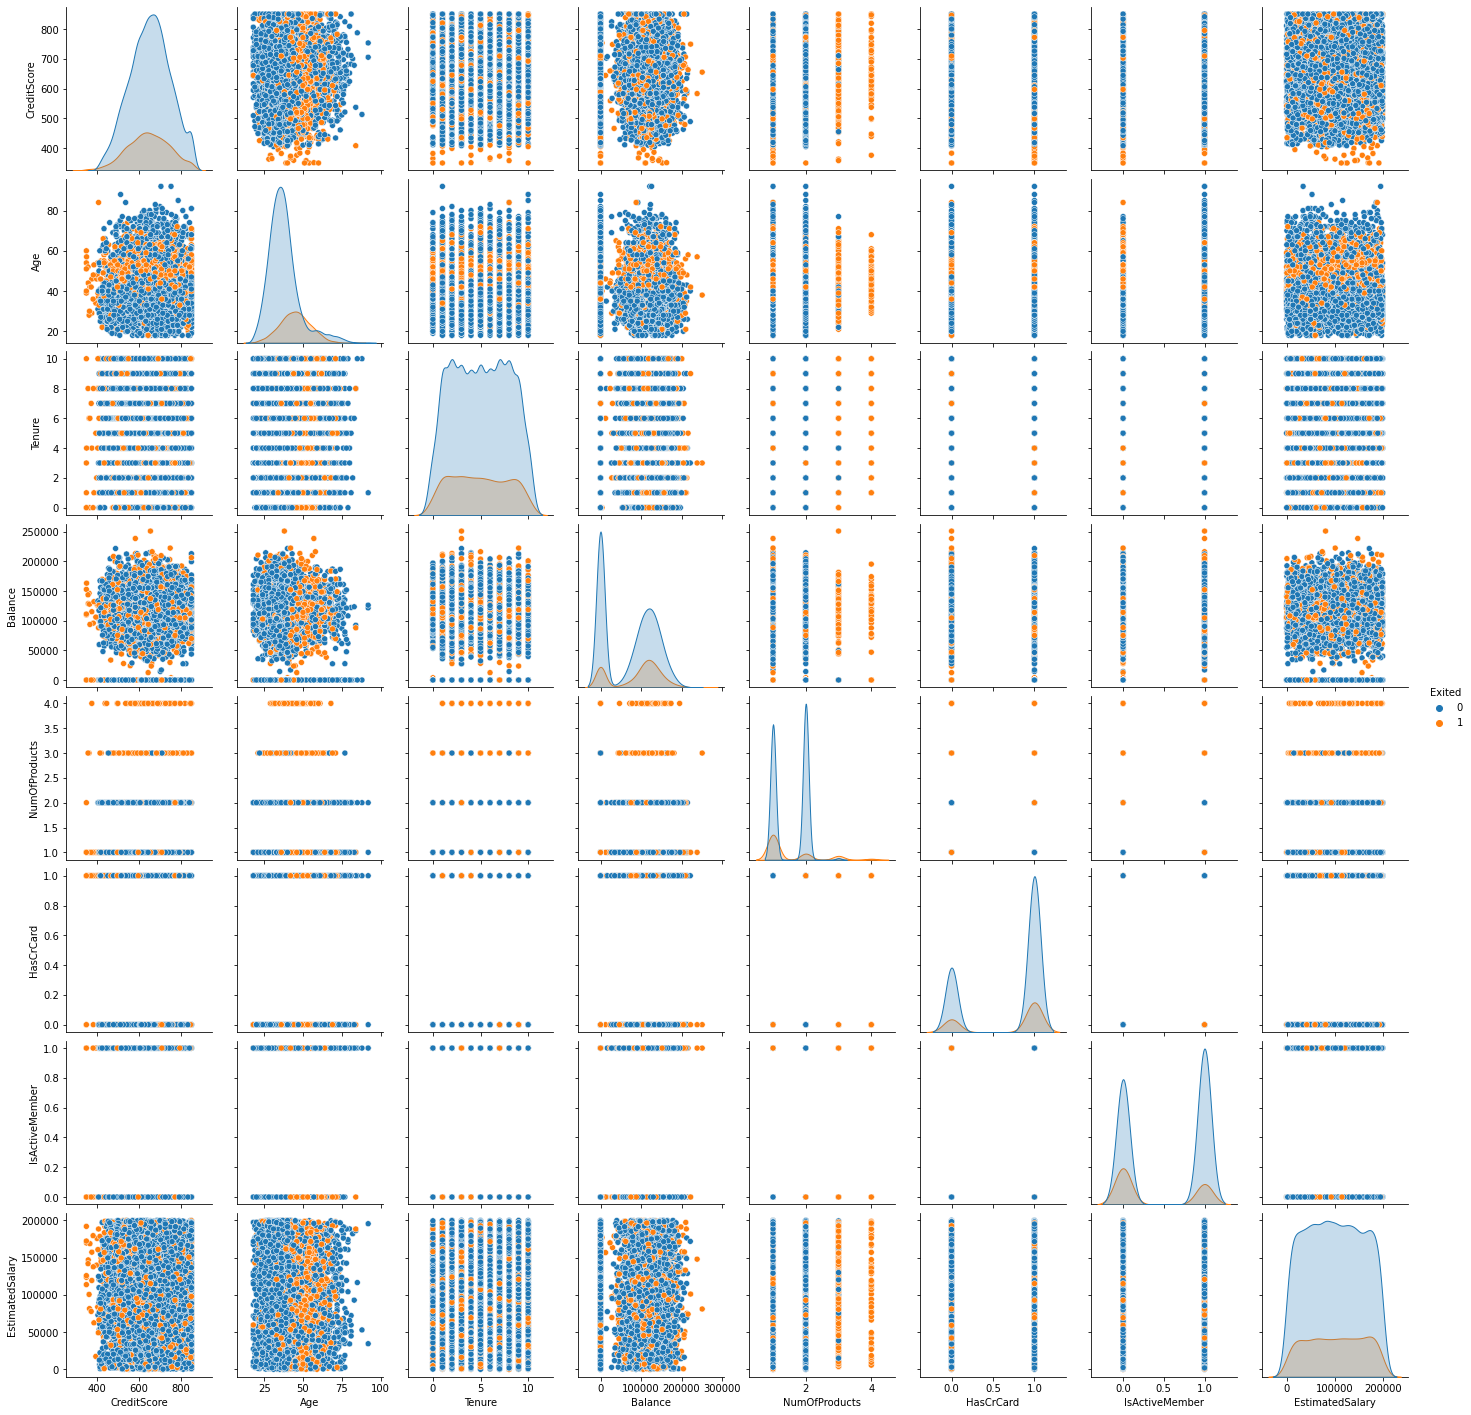

In [22]:
sns.pairplot(data, hue='Exited');

**Вывод**

Корреляция практически не наблюдается, больше всего целевой признак коррелируется с возрастом.  

In [12]:
#переводим категориальные признаки в численные, чтобы не попасть в Дамми-ловушку
data_ohe = pd.get_dummies(data, drop_first=True)
#разделим данные на выборки
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)
#размеры выборок
print(features_train.shape, target_train.shape, features_test.shape, target_test.shape, features_valid.shape, target_valid.shape)

(6818, 11) (6818,) (1137, 11) (1137,) (1136, 11) (1136,)


**Вывод** Перевели категориальные признаки в численные, разделили данные на выборки. С размерами выборок всё в порядке.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен. В дамми-ловушку не попались.
</div>


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В тренажере давался пример использования прямого кодирования с помощью get_dummies, однако это далеко не самый оптимальный вариант. Он подходит для анализа данных, но в машинном обучении может служить причиной ошибок при обучении моделей.
    
Можно использовать класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OHE из sklearn</a>. Он точно понадобится в будущих проектах, можно потренироваться сейчас. 

Практикум подготовил инструкцию, как использовать OHE: https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing 

А теперь замечания «под звездочкой»:

Есть загвоздка, что нам нужно будет одновременно использовать параметры drop='first' и handle_unknown='ignore’.  в OHE, а на платформе такое сочетание может выдавать ошибку (в части случаев). Если ошибка появляется, необходимо загрузить нужную версию сайкит-лерна. Для этого:

1. В отдельной строке в самом начале проекта запускаем такую команду:
 `!pip install scikit-learn==1.1.3`
     
2. Находим в меню юпитера кнопку `Kernel`, нажимаем и выбираем Restart&Run all 


И сразу уточню, что OHE мы используем уже после разделения выборок на обучающую, валидационную и тестовую. Обучаем на трейне, применяем ко всем. Кодируем после разбиения по аналогии с масштабированием. Посмотреть поподробнее также можно здесь <a href="https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset">можно здесь</a> .
      
</div> 


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 С разбиением на выборки согласен. 
</div>


<div class="alert alert-warning">
<h2> Комментарий ревьюера  #2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

 
В выводе можно кратко перечислить, что сделали на предобраотке, можно аргументировать, почему именно так поступили с пропусками. Дать общую характеристику данным (в них не сильно много проблем, что хорошо).

</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Ниже не используем логистическую регрессию, поэтому масштабировать данные необязательно. Выше можно было бы использовать тогда порядковое кодирование (у тебя все верно, но с порядковым кодированием, особенно, когда колонок много, деревья работают чуть быстрее). 
</div> 

## Исследование задачи

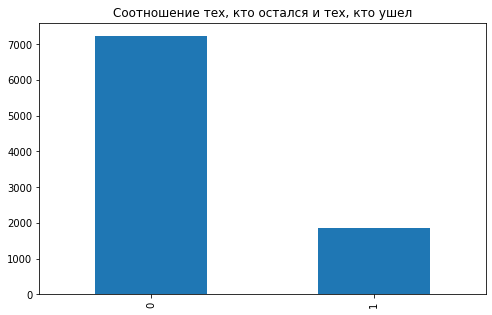

In [13]:
data_ohe['Exited'].value_counts().plot(kind='bar', figsize=(8,5));
plt.title('Соотношение тех, кто остался и тех, кто ушел')
plt.show()

In [14]:
data_ohe['Exited'].value_counts()

0    7237
1    1854
Name: Exited, dtype: int64

Соотношение 72.37% к 18.54%, что говорит нам о том, что наблюдается дисбаланс в данных. 


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Дисбаланс исследовали. Да, он достаточно сильный, чтобы негативно повлиять на качество моделей.
</div>


Построим модели дерово решения и случайного леса на основе несбалансированных данных. Подберем оптимальные гиперпараметры. Получим значения F1 меры и сравним с метрикой AUC-ROC. 

**Дерево решений**

In [15]:
for depth in range(1, 16, 1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('max_depth:',depth, 'F1 мера:',f1_score(target_valid, predictions_valid))

max_depth: 1 F1 мера: 0.0
max_depth: 2 F1 мера: 0.5643564356435643
max_depth: 3 F1 мера: 0.44012944983818775
max_depth: 4 F1 мера: 0.5730027548209367
max_depth: 5 F1 мера: 0.5212121212121212
max_depth: 6 F1 мера: 0.5754189944134078
max_depth: 7 F1 мера: 0.5729166666666667
max_depth: 8 F1 мера: 0.5464190981432361
max_depth: 9 F1 мера: 0.5343511450381679
max_depth: 10 F1 мера: 0.4961636828644501
max_depth: 11 F1 мера: 0.5206812652068126
max_depth: 12 F1 мера: 0.4964200477326968
max_depth: 13 F1 мера: 0.5069767441860464
max_depth: 14 F1 мера: 0.48291571753986334
max_depth: 15 F1 мера: 0.46220302375809935


Лучшая F1 мера 0.56158940397351, при грубине 7

In [16]:
#вычисляем метрику AUC-ROC
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.6555163643343891


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Всё верно
</div> 


**Случайный лес**

In [38]:
best_model = None
best_result = 0
best_estim = 0
best_depth = 0
for estim in range(40, 85, 2):
    for depth in range(1, 12):
        model = RandomForestClassifier(random_state=12345, n_estimators=estim, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_estim = estim
            best_depth = depth
print('Лучшее количество деревьев:',best_estim,'Лучшая глубина',best_depth,'Лучшая F1 мера:',best_result)
        

Лучшее количество деревьев: 84 Лучшая глубина 11 Лучшая F1 мера: 0.5895316804407713


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
В лесе необходимо подобрать минимум глубину и количество оценщиков (эстиматоров, деревьев). Можно сделать в двойном цикле:
    
`for est in range(10, 51, 10):
    for depth in range(1, 6):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)`
   

</div>


Лучшая F1 мера 0.5895316804407713, при количестве деревьев: 84, грубине: 11

In [23]:
#вычисляем метрику AUC-ROC
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8678136097514156


**Вывод** Лучше всего показала себя модель случайного леса с показателем F1 меры 0.5895316804407713

## Борьба с дисбалансом

**Взвешивание классов**

In [39]:
#дерево решений
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 16, 1):
    model_balance = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    model_balance.fit(features_train, target_train)
    predictions_valid = model_balance.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
            best_model = model_balance
            best_result = result
            best_depth = depth
    
print('Лучшая глубина',best_depth,'Лучшая F1 мера:',best_result)

#вычисляем метрику AUC-ROC
probabilities_valid = model_balance.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC ROC:',auc_roc)

Лучшая глубина 5 Лучшая F1 мера: 0.5685279187817259
AUC ROC: 0.6884753815145408


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь изменились вводные  - теперь используем class_weight='balanced'. Необходимо заново обучать модели и заново находить лучшие гиперпараметры.

</div>



F1 мера почти не изменилась, как и показатели AUC ROC

In [37]:
#случайный лес
best_model = None
best_result = 0
best_estim = 0
best_depth = 0
for estim in range(40, 85, 2):
    for depth in range(1, 12):
        model_balance2 = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345, class_weight='balanced')
        model_balance2.fit(features_train, target_train)
        predictions_valid = model_balance2.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model_balance2
            best_result = result
            best_estim = estim
            best_depth = depth
print('Лучшее количество деревьев:',best_estim,'Лучшая глубина',best_depth,'Лучшая F1 мера:',best_result)


#вычисляем метрику AUC-ROC
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC ROC:',auc_roc)

Лучшее количество деревьев: 76 Лучшая глубина 11 Лучшая F1 мера: 0.6547884187082404
AUC ROC: 0.8582109607447932


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Tакже нужно будет заново подобрать гиперпараметры.
       
</div>

  

Улучшения по всем показателям

**Увеличение выборки**

In [40]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

#дерево решений
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 16, 1):
    model_balance3 = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_balance3.fit(features_upsampled, target_upsampled)
    predictions_valid = model_balance3.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
            best_model = model_balance3
            best_result = result
            best_depth = depth
    
print('Лучшая глубина',best_depth,'ДР Лучшая F1 мера:',best_result)

#вычисляем метрику AUC-ROC
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('ДР AUC ROC:',auc_roc)

#случайный лес
best_model = None
best_result = 0
best_estim = 0
best_depth = 0
for estim in range(40, 85, 2):
    for depth in range(1, 12):
        model_balance4 = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345)
        model_balance4.fit(features_upsampled, target_upsampled)
        predictions_valid = model_balance4.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model_balance2
            best_result = result
            best_estim = estim
            best_depth = depth
print('Лучшее количество деревьев:',best_estim,'Лучшая глубина',best_depth,'СЛ Лучшая F1 мера:',best_result)

#вычисляем метрику AUC-ROC
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('СЛ AUC ROC:',auc_roc)

Лучшая глубина 5 ДР Лучшая F1 мера: 0.5685279187817259
ДР AUC ROC: 0.8317136961320664
Лучшее количество деревьев: 78 Лучшая глубина 10 СЛ Лучшая F1 мера: 0.6356877323420076
СЛ AUC ROC: 0.8589068048757078


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично, что используешь рукописную функцию, но здесь можно все оптимизировать, используя <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html">SMOTE</a> для увеличения выборки и <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html">RandomUnderSampler</a>  для уменьшения. 
    
Апсемплинг делается очень просто:
    
`oversample = SMOTE(random_state=RANDOM_STATE)`

`features_train_up, target_train_up = oversample.fit_resample(features_train_enc, target_train)`
    
*предварительно импотрировав `from imblearn.over_sampling import SMOTE`

**Чтобы импортировать imblearn его сначала требуется проинсталлировать. через `!pip install imblearn`
    
</div>




<div class="alert alert-info"> <b>Комментарий студента: </b> Не получилось импортировать SMOTE. Пишет "cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (/opt/conda/lib/python3.9/site-packages/sklearn/base.py)"</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера  #2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Ок, иногда такое бывает. Можно перезапустить ядро через Kernel Restart&run. Если не поможет, то останемся на том варианте, который есть. 
</div>


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь ты дублируешь редкий класс в 10 раз. У нас же, как мы увидели раньше, дисбаланс составляет 1:4. То есть, теперь окажется, что бывший редкий класс будет в 2,5 раза чаще встречаться.
    
Правильно будет довести баланс классов до 1:1, то есть, умножить на 4 (подав такой коэффициент в функцию).

</div> 


**Вывод** По всем показателям лучше проявила себя модель случайного леса, поэтому выбираем ее для тестирования. Методом борьбы с дисбалансом выбираем взвешивание классов.
Добавив гиперпараметр class_weight='balanced' к обоим моделям улучшились показатели и в модели дерево решений и случайного леса. F1 мера на лучшей модели равна 0.6547884187082404, при глубине 11 и количестве деревьев 76. 

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь нужно оставить более подробный промежуточный комментарий с качеством и гиперпараметрами лучшей модели − той, которую возьмем на тестирование. Если это не модель с лучшим значением F1, то можно пояснить, почему выбрали ее (например, скорость обучения высокая).

</div>




## Тестирование модели

In [52]:
#модель случайного леса
model = RandomForestClassifier(n_estimators=76, max_depth=11, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
result = f1_score(target_test, predictions_test)
if result > best_result:
    best_model = model
    best_result = result
        
print("F1 мера лучшей модели:", best_result)    

    

F1 мера лучшей модели: 0.6356877323420076


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
При тестировании мы уже смотрим на одну лучшую модель с лучшими гиперпараметрами. Здесь ничего не подбираем. Тестирование - это применение чистых данных, которые наша модель еще не видела. Таким образом мы можем получить представление о том, какое качество модели мы можем ожидать в проде, в реальной жизни. 
    
Важно в тесте посмотреть на одну модель и с лучшими гиперпараметрами, подобранными ранее.

</div>


In [53]:
#вычисляем метрику AUC-ROC
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC ROC:',auc_roc)

AUC ROC: 0.8582109607447932


# Общий вывод

В ходе данного исследования мы изучили исходные данные, удалили ненужные столбцы, просмотрели кореляцию целевого признака относительно других. Затем перевели категориальные признаки в численные, чтобы не попасть в Дамми-ловушку, разделили данные на выборки.
Изучив целевой признак мы пришли к выводу, что наблюдается дисбаланс в данных. Приняв это во внимание, начали искать лучшую модель по показаниям F1 меры.
Следующим шагом мы выбрали метод борьбы с дисбалансом и лучшую модель.
В итоге мы протестировали выбранную модель случайного леса на тестовой выборке, с показателем глубины 11 и количества деревьев 76, метод борьбы с дисбалансом - Взвешивание классов(class_weight='balanced'), и получили результат F1 меры в районе 0.64, тем самым удалось достигнуть результата не мене 0.59.
Посчитаем recall. Полнота равна примерно 0.58. Именно такую долю клиентов на отток мы определяем верно.

In [56]:
print(recall_score(target_test, predictions_test))

0.579185520361991


In [ ]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
predictions_test = dummy_model.predict(features_test, target_test)
print('F1 мера:',f1_score(target_test, predictions_test))

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Необходимо дополнить общий вывод по проекту: описать лучшую модель, ее результаты на тестовой выборке, сравнить модель с константной, прокомментировать, как модель решает задачу бизнеса: здесь можно подсчитать recall и объяснить, какую долю клиентов на отток мы детектируем верно.

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь в дамми-модели я бы предсказал везде «1». Условно говоря, если предсказываем ноль, моделируем ситуацию, когда акцию с бонусами для удержания клиентов решили не проводить. Если предсказываем единицу − решили раздать бонусы вообще всем клиентам. Если в дамми-модели предсказываем по единице, можно подсчитать F1, она не будет зануляться.
    
`dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_score(dummy_model.predict(features_test), target_test)`
    
Импорт: from sklearn.dummy import DummyClassifier

       
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Есть несколько важных моментов, которые необходимо улучшить. Их ты найдешь в разноцветных комментариях.
    
**Отмечу положительные моменты проекта🚀**
    
* Выбор моделей, порядок исследования.
* Есть пояснения к шагам, код с высокой читаемостью. 

    
**На что стоит обратить внимание🤔**
    
* Гиперпараметры моделеям подбираем в каждом случае применения методики борьбы с дисбалансом и в исследовании моделей без учета дисбаланса.
* Апсемпилнг нужно довести до баланса классов (1:1, умножаем редкий класс на 4). Также и с даунсемплингом.
* Необходимо везде оставлять промежуточные выводы и дополнить итоговый вывод.
* Необходимо достичь качества модели F1>0.59 на тестовой выборке без подбора гиперпараметров в тесте.
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>





<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за доработку. Критичных комментариев нет. 
    
Желаю удачи в дальнейшей учебе!

</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*